In [42]:
# https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57
# Replaced any IBU above 120 with 120 based on this article https://www.thebrewenthusiast.com/ibus/
# Replaced any OG over 1.075 with 1.075 https://www.craftbeer.com/craft-beer-muses/high-gravity-beer-big-risk-bigger-reward

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from Util import loadBeer,loadWine
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import time
from mpl_toolkits.mplot3d import axes3d, Axes3D

In [32]:
X_train, X_test, y_train, y_test= loadBeer()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Dan\Documents\notebooks\MachineLearning\assignment3\dpolenik3\Util.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  recipes_train.loc[maskHigh, column_name] = 120
C:\Users\Dan\Documents\notebooks\MachineLearning\assignment3\dpolenik3\Util.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  recipes_train.loc[maskLow

In [33]:
X_train.head()

,OG,FG,ABV,IBU,Color
BeerID,,,,,
17868,1.056,1.014,5.50,36.33,3.86
53672,1.063,1.016,6.13,5.00,37.86
56239,1.051,1.010,5.39,47.50,6.42
5891,1.063,1.018,6.00,84.60,12.69
9124,1.069,1.014,7.19,50.26,50.00


In [39]:
scores =[]
timeTaken=[]
models=[]
for k in range(1,40):
    kmeans = KMeans(n_clusters=k, random_state=0)
    start = time.time()
    scores.append(kmeans.fit(X_train).score(X_train))    
    end = time.time()
    totalTime = end -start
    if k % 5 == 0:
        print("Training k = "+str(k)+" clusters...")
    timeTaken.append(totalTime)
    models.append(kmeans)


Training k = 5 clusters...
Training k = 10 clusters...
Training k = 15 clusters...
Training k = 20 clusters...
Training k = 25 clusters...
Training k = 30 clusters...
Training k = 35 clusters...


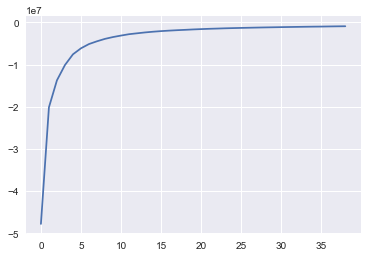

In [40]:
plt.plot(scores, label="score")

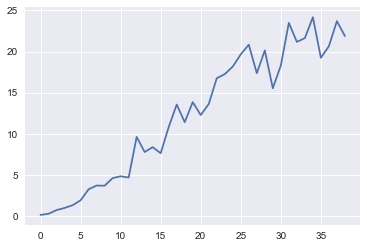

In [45]:
plt.plot(timeTaken, label="Training Time")

In [48]:
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X_train)
y_kmeans = kmeans.predict(X_train)

Text(0.5,0,'Color')

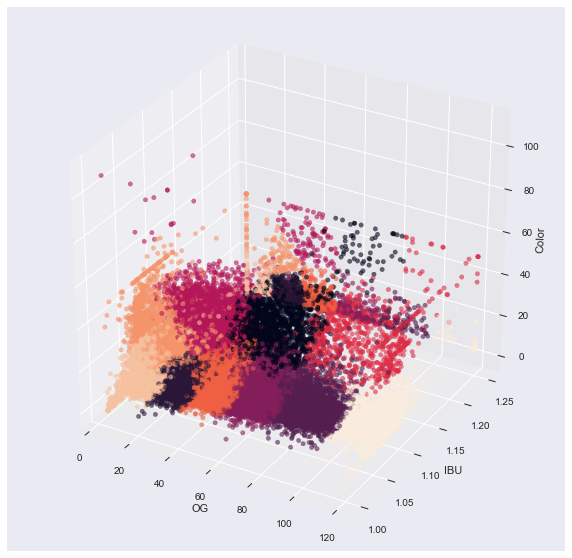

In [49]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ys = X_train[['OG']].values.flatten()
zs = X_train[['Color']].values.flatten()
xs = X_train[['IBU']].values.flatten()

ax.scatter(xs, ys, zs, alpha=0.6, c=y_kmeans)
ax.set_xlabel('OG')
ax.set_ylabel('IBU')
ax.set_zlabel('Color')

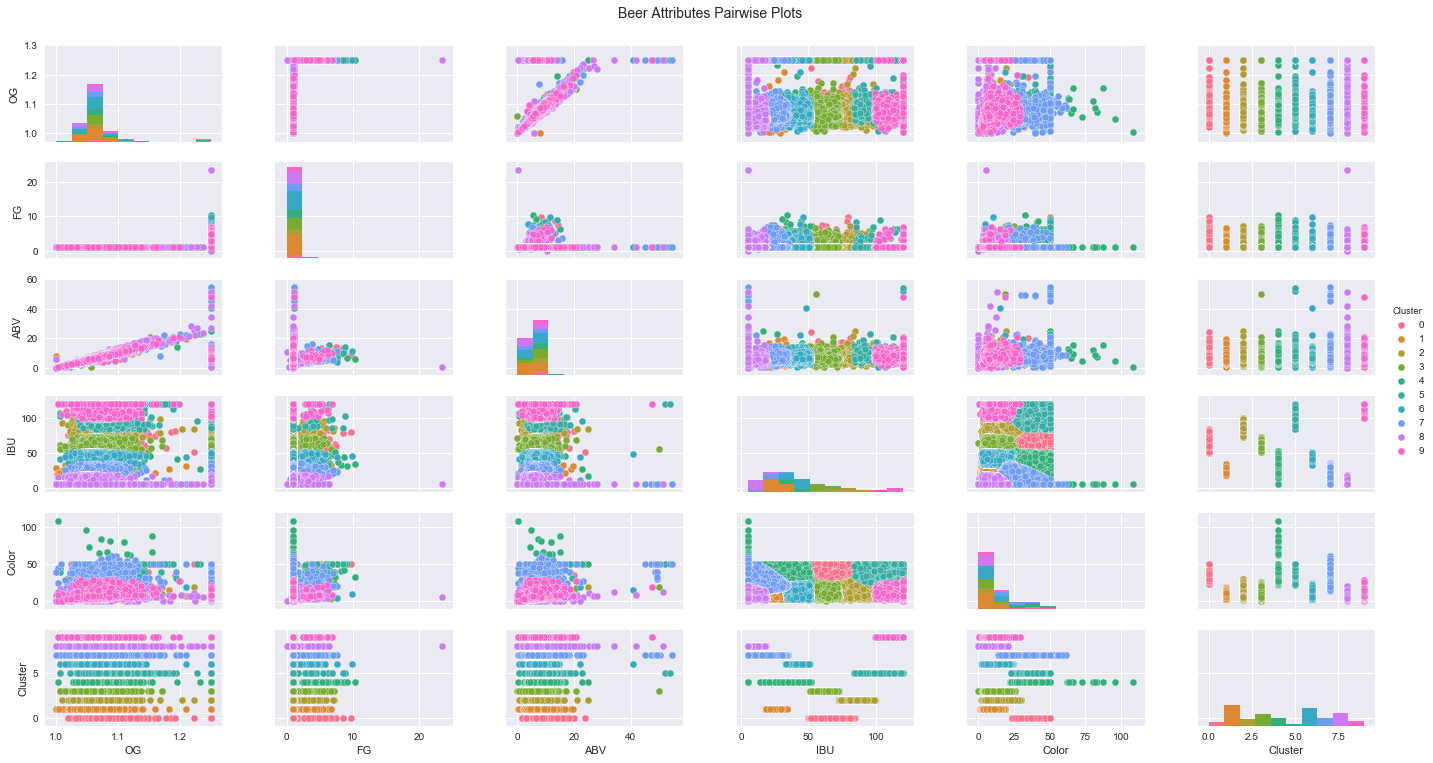

In [66]:
X_train['Cluster'] =y_kmeans
cols = ['OG','FG','ABV','IBU','Color','Cluster']
pp = sns.pairplot(X_train[cols], hue='Cluster', size=1.8, aspect=1.8)
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Beer Attributes Pairwise Plots', fontsize=14)

# Wine

In [67]:
X_train, X_test, y_train, y_test= loadWine()

In [14]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1569,6.2,0.51,0.14,1.9,0.056,15.0,34.0,0.99396,3.48,0.57,11.5
148,6.9,0.49,0.10,2.3,0.074,12.0,30.0,0.99590,3.42,0.58,10.2
570,11.5,0.35,0.49,3.3,0.070,10.0,37.0,1.00030,3.32,0.91,11.0
737,8.2,0.59,0.00,2.5,0.093,19.0,58.0,1.00020,3.50,0.65,9.3
565,12.7,0.60,0.49,2.8,0.075,5.0,19.0,0.99940,3.14,0.57,11.4


In [16]:
scores =[]
timeTaken=[]
for k in range(1,40):
    kmeans = KMeans(n_clusters=k, random_state=0)
    start = time.time()
    scores.append(kmeans.fit(X_train).score(X_train))    
    end = time.time()
    totalTime = end -start
    if k % 5 == 0:
        print("Training k = "+str(k)+" clusters...")
    timeTaken.append(totalTime)


Training k = 5 clusters...
Training k = 10 clusters...
Training k = 15 clusters...
Training k = 20 clusters...
Training k = 25 clusters...
Training k = 30 clusters...
Training k = 35 clusters...


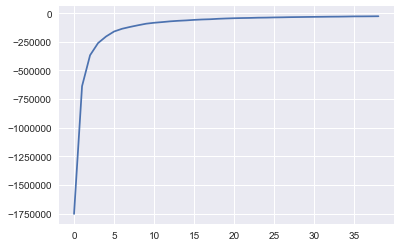

In [17]:
plt.plot(scores, label="score")

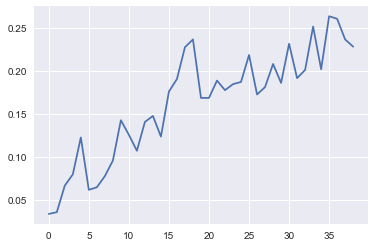

In [18]:
plt.plot(timeTaken, label="Training Time")

In [68]:
kmeans = KMeans(n_clusters=8, random_state=0)
kmeans.fit(X_train)
y_kmeans = kmeans.predict(X_train)

Text(0.5,0,'citric acid')

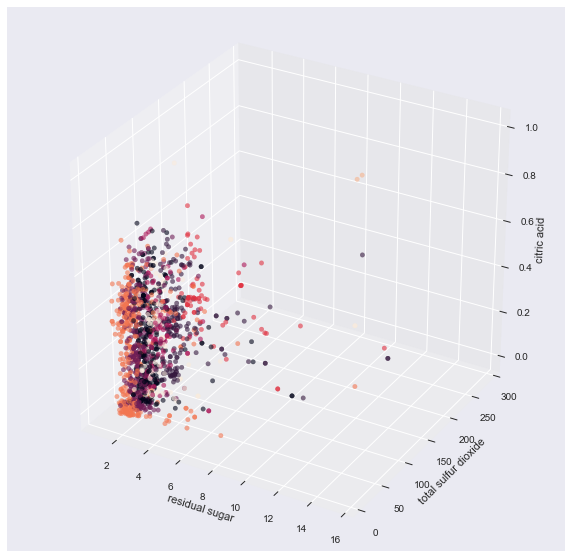

In [30]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ys = X_train[['total sulfur dioxide']].values.flatten()
xs = X_train[['residual sugar']].values.flatten()
zs = X_train[['citric acid']].values.flatten()

ax.scatter(xs, ys,zs,  alpha=0.6, c=y_kmeans)
ax.set_xlabel('residual sugar')
ax.set_ylabel('total sulfur dioxide')
ax.set_zlabel('citric acid')

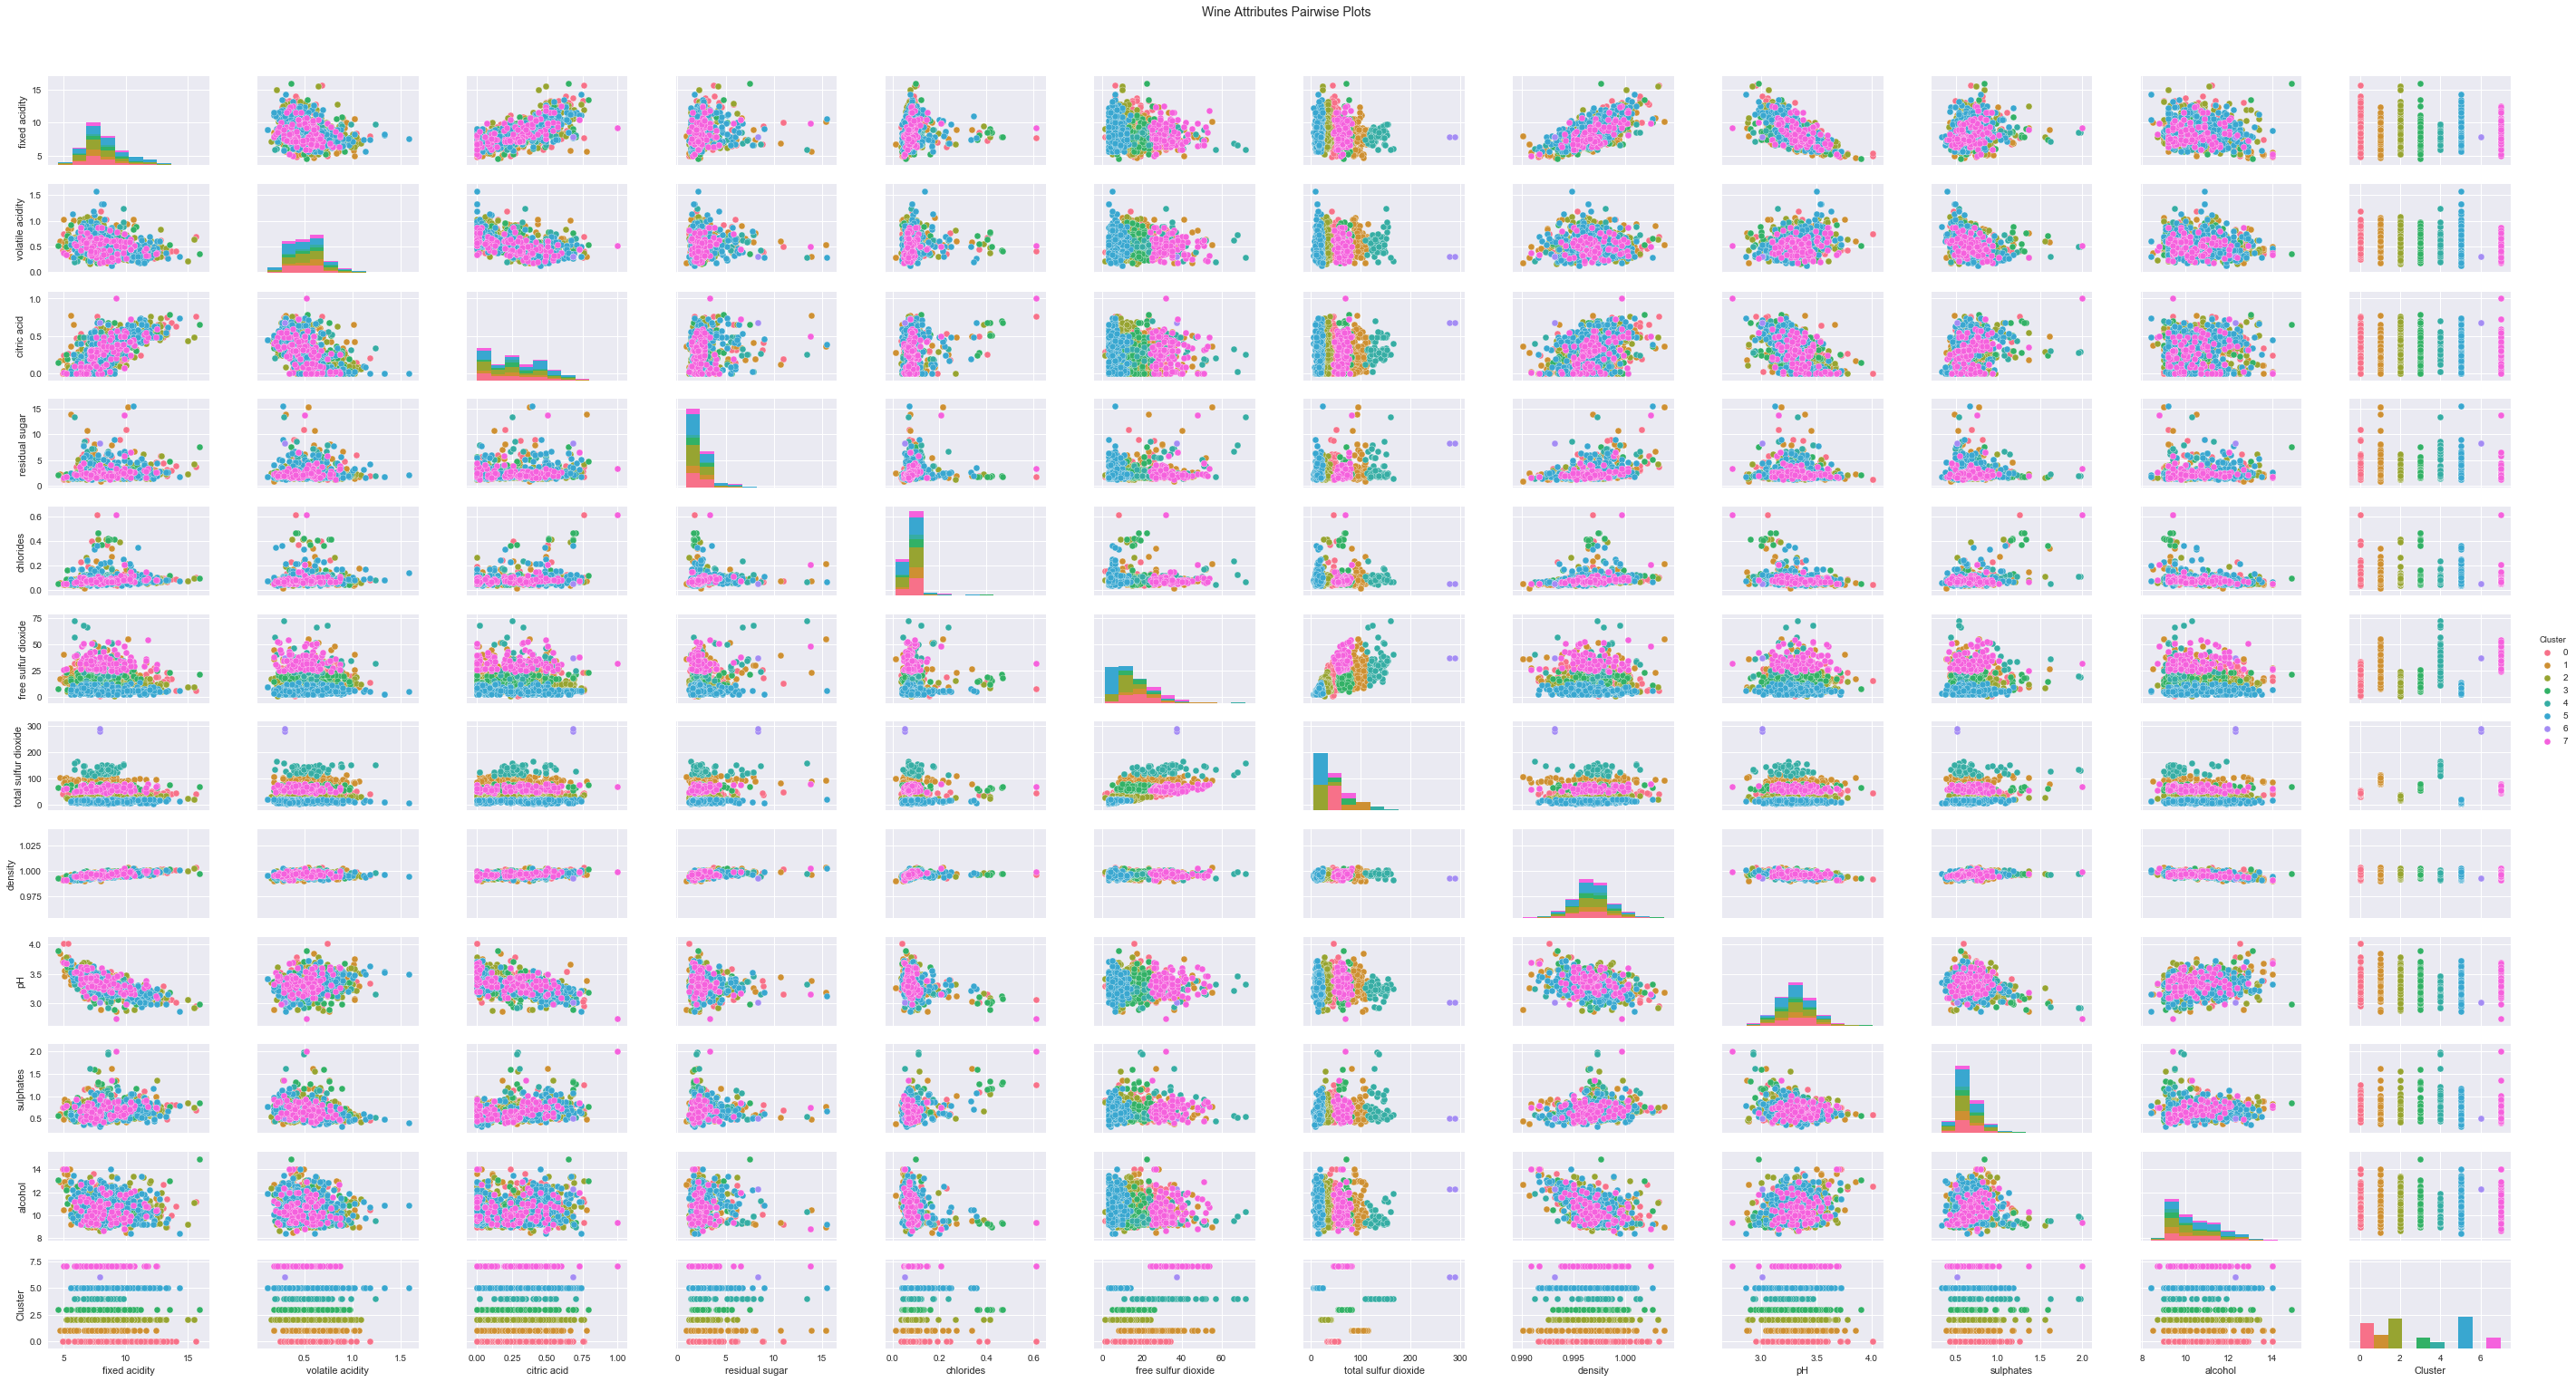

In [71]:
# Scatter Plot with Hue for visualizing data in 3-D
X_train['Cluster'] =y_kmeans
pp = sns.pairplot(X_train, hue='Cluster', size=1.8, aspect=1.8)
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)